## A1:PROPOSAL OF QUESTION

The research question that I want to ask for this task is "What quantitative and binary qualitative factors contribute most to whether or not a customer will churn?". I did a similar analysis in my D208 assessment task 2. This is a useful analysis to explore because it helps us understand what customer factors may possibly affect what causes a customer to be a customer that churns and a customer that doesn't. It can also help with planning for the future, to see if there will be more or less customers that are churning.

## A2:DEFINED GOAL

The goal is to determine which quantitative and binary qualitative factors are most significantly correlated to the variable of churn. In order to determine this, I am going to use scikitlearn and the K nearest neighbors method in order. This will leave us with a set of variables that are related to churn and those that are not. From these list of variables that are relevant, we can then begin to make interpretations about the data and how it can be used to affect churn in a way that is beneficial to the business.

## B1:EXPLANATION OF CLASSIFICATION METHOD

For the analysis I am going to be using K nearest neighbors to classify contributing factors as to whether or not a customer is going to churn. K nearest neighbors plots the data points on a graph and tries to categorize the data points by relative distance to one another on the chart.

The user sets the parameter for k number of points which is closest to the test data area, and the largest amount that is nearby is the predicted class. It is like a voting system, where the number of nearby points in a category counts as a vote, and the cateogry with the most vote is what the point being assessed is categorized as.

## B2:SUMMARY OF METHOD ASSUMPTION

One assumption of the k-nearest-neighbors classification method is that similar things are near one another. If this is not iherintly true for the data, then the method does not work. For instance, is a data point is a certain class but it is a distance away from most of the other points in its class, it will not be categorized as the class it should be classified as.

## B3:PACKAGES OR LIBRARIES LIST

I have used the following packages for my analysis:
- Pandas: This library is essential to import the CSV and apply analysis to the data.
- numpy: We use numpy to use arrays and set up the dataframe to be used for statistical analysis
- matplotlib: We use matplotlib for visualization such as histograms
- scikitlearn: This is the library that is used to bring in the k nearest neighbors classification model
- scipy.stats: Used to find z-scores

In [47]:
# import the libraries
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import scipy.stats as stats


## C1:DATA PREPROCESSING

We need to one hot encode the binary qualitative variables as we need our variables to be qualitative. For the quantitative variables we need to fill in missing data, fix outliers, and duplicates.

## C2:DATA SET VARIABLES

For the quantitative variables we need: 

- Churn: This is a binary variable with either yes or no values.
- Techie: This is a binary variable with either yes or no values.
- Port_modem: This is a binary variable with either yes or no values.
- Tablet: This is a binary variable with either yes or no values.
- InternetService: This is a binary variable with either yes or no values.
- Phone: This is a binary variable with either yes or no values.
- Multiple:This is a binary variable with either yes or no values.
- OnlineSecurity: This is a binary variable with either yes or no values.
- OnlineBackup: This is a binary variable with either yes or no values.
- DeviceProtection: This is a binary variable with either yes or no values.
- TechSupport: This is a binary variable with either yes or no values.
- StreamingTV: This is a binary variable with either yes or no values.
- StreamingMovies: This is a binary variable with either yes or no values.
- PaperlessBilling: This is a binary variable with either yes or no values.

For the quantitative we need:

- Population: The average population is 6817, the minimum is 2, and the maximum is 38,597. We can once again see the zeroes have been removed as per our treatment of nulls earlier in the analysis.
- Children: The mean, which is calculated by adding up all the values and dividing by the n amount, is around 1.7 children. The most children is 6, and the least is 0.
- Age: The average age is around 53. This means many of the customers tend to be older. The youngest customer is 18 and the oldest is 89.
- Income: The average income is around 35,688 dollars. The lowest is 348 dollars and the highest is 96,190.
- Outage_sec_perweek: On average there is an average outage time of 10 seconds per week. The minimum or lowest time is 4 seconds, and the highest is 15. This is interesting as we learn that there is never a point in time where there is a week without outages. 
- Email: The avereage number of emails is 12. The minimum is 6 and the maximum is 18. This gives us insight that depending on the customer, different amounts of emails are sent. This may be because the business segments its customers or because some customers joined at different times and thus were not included in previous emails.
- Contacts: The average for this variable is .8. The minimum is 0 and the max is 2. This shows us that customers do not frequently contact customer support, with the most a customer contacting them being 2 recorded times.
- Yearly_equip_failure: The average for this variable is .3. The minimum is 0 and the maximum is 1. This shows us that its not frequent for a customer's equipment to fail, and that it will most likely not occur more than once according to our recorded history.
- Tenure: The average tenure is around 34.5 months. The minimum is 1 and the max is 72. This shows us that tenure of the customer does generally not last for more than a few years according to our data.
- MonthlyCharge: The average monthly charge is about 172 dollars a month. The minimum is 80 and max is 290. This could be due to different customers having different plans, customizable services, and offers. 
- Bandwidth_gb_year: This is the amount of gb a customer uses per year.  On average it is 3392, with the lowest being 155.5 and the highest being 7158.98 gb.
- Item1 through Item8: Items 1 through 8 should all have a minimum of 2 and a max of 5. This could be a result of how we cleaned the data, removing any outliers. On average the amount is about 

In [48]:
dfq_cq = ['Churn','Techie','Port_modem','Tablet','Phone','Multiple','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling']


## C3:STEPS FOR ANALYSIS

First I will deal with the quantitative variables. It can be seperated into 3 steps: treating nulls, treating duplicates, and treating outliers.

In [49]:
df = pd.read_csv('churn_clean.csv')

In [50]:
dfq = df.drop(['CaseOrder','Customer_id','Interaction','UID','City','State','County','Zip','Lat','Lng','Area','TimeZone','Job','Marital','Gender','Churn','Techie','Contract','Port_modem','Tablet','InternetService','Phone','Multiple','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','PaymentMethod'],axis=1)
dfq

,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,38,0,68,28561.99,7.978323,10,0,1,6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4
1,10446,1,27,21704.77,11.699080,12,0,1,1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3735,4,50,9609.57,10.752800,9,0,1,15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,13863,1,48,18925.23,14.913540,15,2,0,17.087227,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,11352,0,83,40074.19,8.147417,16,2,1,1.670972,149.948316,271.493436,4,4,4,3,4,4,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,640,3,23,55723.74,9.415935,12,2,0,68.197130,159.979400,6511.252601,3,2,3,3,4,3,2,3
9996,77168,4,48,34129.34,6.740547,15,2,0,61.040370,207.481100,5695.951810,4,5,5,4,4,5,2,5
9997,406,1,48,45983.43,6.590911,10,0,0,47.416890,169.974100,4159.305799,4,4,4,4,4,4,4,5
9998,35575,1,39,16667.58,12.071910,14,1,0,71.095600,252.624000,6468.456752,4,4,6,4,3,3,5,4


### Treat Nulls

We begin by checking the dataframe for nulls. We can use .isnlull().sum() to look through the variables and see if there is any missing data. Using this function we can see that there are no nulls present in the data. Another thing I would like to check is population. This is because for a value like this, it cannot be 0 since it should count the customer. Using the nsmallest() function, we can see that zeroes do exist within the data. I would like to drop those zeroes and replace it with the median as the distribution is skewed right. We determine the distribution by creating a histogram of population. After dropping all the zero values from population and replacing them with median, we can see our minimum is no longer zero. 

In [51]:
dfq.isnull().sum()

Population              0
Children                0
Age                     0
Income                  0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Tenure                  0
MonthlyCharge           0
Bandwidth_GB_Year       0
Item1                   0
Item2                   0
Item3                   0
Item4                   0
Item5                   0
Item6                   0
Item7                   0
Item8                   0
dtype: int64

In [52]:
# Check the poulation for zeroes
dfq.Population.nsmallest(n=10)

13     0
422    0
428    0
434    0
446    0
682    0
694    0
719    0
814    0
839    0
Name: Population, dtype: int64

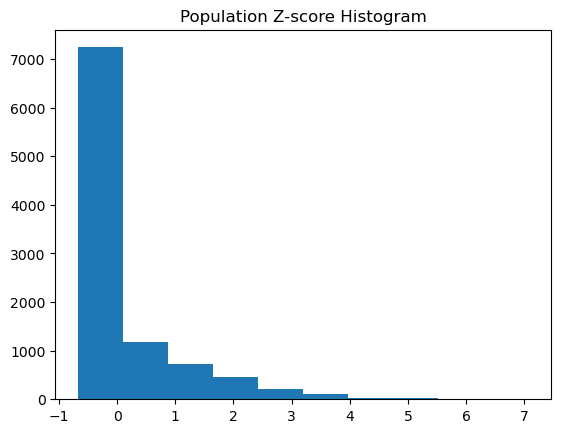

In [53]:
# create hist for population
dfq['zscore'] = stats.zscore(dfq['Population'])
plt.hist(dfq['zscore'])
plt.title('Population Z-score Histogram')
plt.show()

In [54]:
# drop all zeroes
dfq['Population'] = np.where(dfq['Population'] == 0, np.nan, dfq['Population'])
# fill with median as it is skewed right
dfq['Population'] = dfq['Population'].fillna(dfq['Population'].median())

In [55]:
# Check the poulation for zeroes
dfq.Population.nsmallest(n=10)

4453    2.0
261     4.0
3475    4.0
6018    4.0
2613    5.0
2092    6.0
2192    6.0
5054    6.0
5149    6.0
6048    6.0
Name: Population, dtype: float64

In [56]:
#drop zscore
dfq = dfq.drop(['zscore'],axis=1)

### Treat Duplicates

Next, we will check to see if there are any duplicates in the data. We can do this by using .duplicated().value_counts() which will output a true or false depending on whether or not duplicates exist within the dataframe. We can see from the output of false 10,000 times that there are no duplicates within the data.

In [57]:
dfq.duplicated().value_counts()

False    10000
dtype: int64

### Treat Outliers

We can start by checking the histograms of all of our quantiative variables. After looking through it, the distributions are as follows:
-   'Population' - skewed right 
-   'Children' - skewed right 
-   'Age' - uniform 
-   'Income' - skewed right 
-   'Outage_sec_perweek' - normal 
-   'Email' - normal 
-   'Contacts' - skewed right 
-   'Yearly_equip_failure' - skewed right 
-   'Tenure' - bimodal  
-   'MonthlyCharge' - normal 
-   'Bandwidth_GB_Year' - bimodal 
-   'Item1' - normal 
-   'Item2' - normal 
-   'Item3' - normal 
-   'Item4' - normal 
-   'Item5' - normal 
-   'Item6' - normal 
-  'Item7' - normal 
-   'Item8' - normal 

This is useful information to note for later. We can also identify from our histograms if the data passes 3 standard deviations. I will use that as a cutoff for what we identify as outliers. Using this benchmark, the following variables contain outliers:
- Population, Children, Income, Outage_sec_perweek, Email, Contacts, Yearly_equip_failure, Item1, Item2, Item3, Item4, Item5, Item6, Item7, and Item8

Now that I know what variables are the ones that need to be solved, I can run a for loop to drop the outliers which are values equivalent to a z-score greater or less than 3 and -3 three respectively. We also need to know the distribution to understand what we need to imputer these variables with. For population we impute with median since it is skewed right. For children, we use median since it's skewed right. For income we use median. For outage_sec_perweek we use mean since it is distributed normally. For Email we use mean. For Contacts we use median. For Yearly_equip_failure we use median. For item1 through item8 we use mean.

After the for loop runs for both median and for mean, we are able to see that the histograms are fixed and the outliers have been treated.

In [58]:
# create a list of columns
dfq_c = dfq.columns.tolist()
dfq_c

['Population',
 'Children',
 'Age',
 'Income',
 'Outage_sec_perweek',
 'Email',
 'Contacts',
 'Yearly_equip_failure',
 'Tenure',
 'MonthlyCharge',
 'Bandwidth_GB_Year',
 'Item1',
 'Item2',
 'Item3',
 'Item4',
 'Item5',
 'Item6',
 'Item7',
 'Item8']

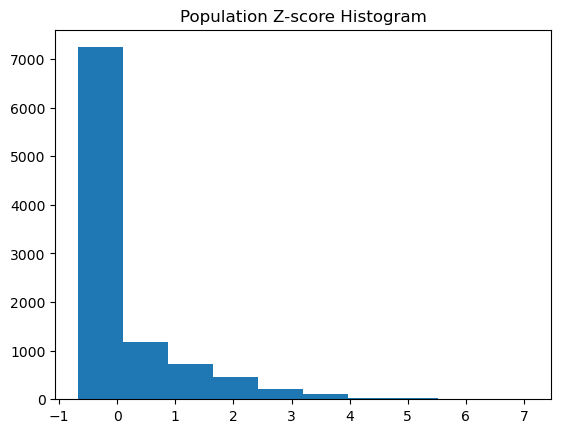

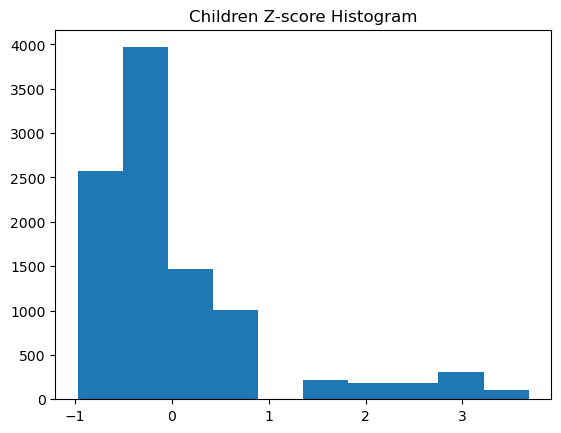

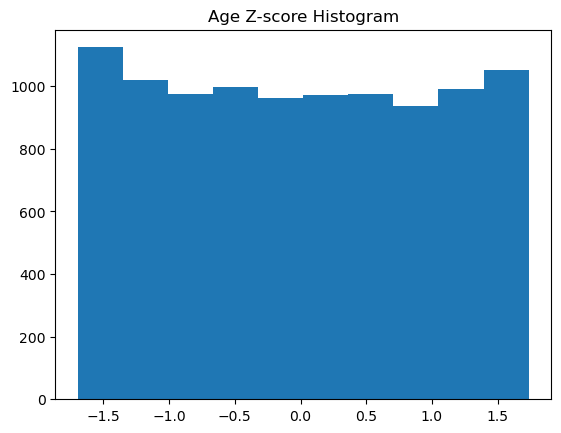

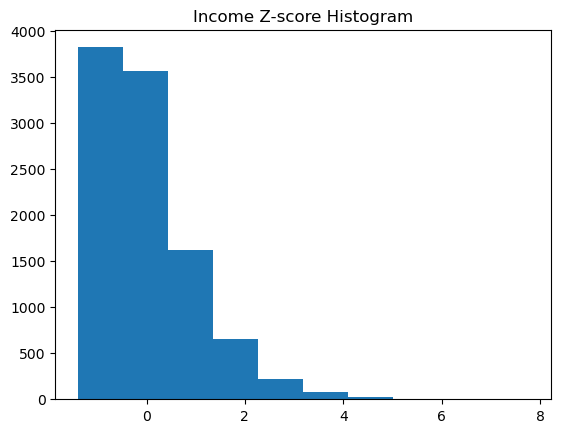

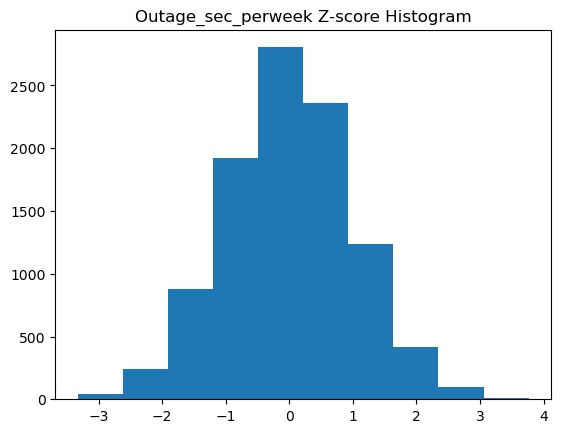

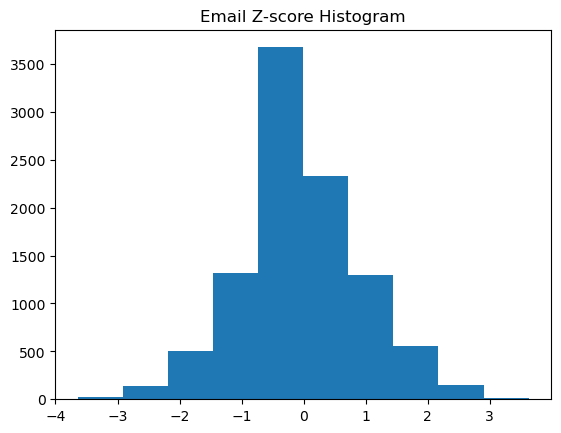

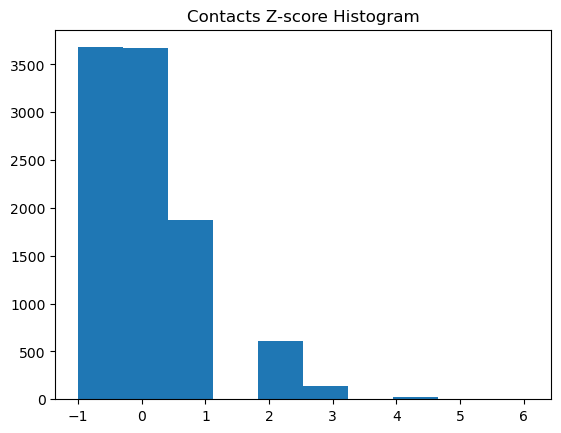

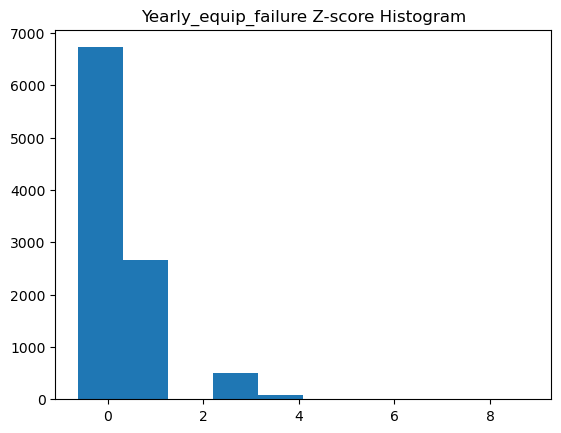

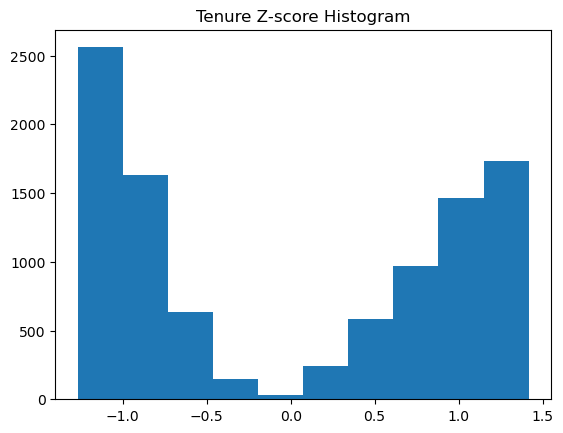

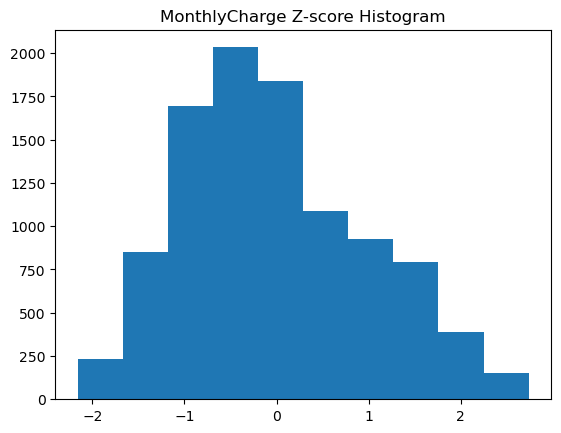

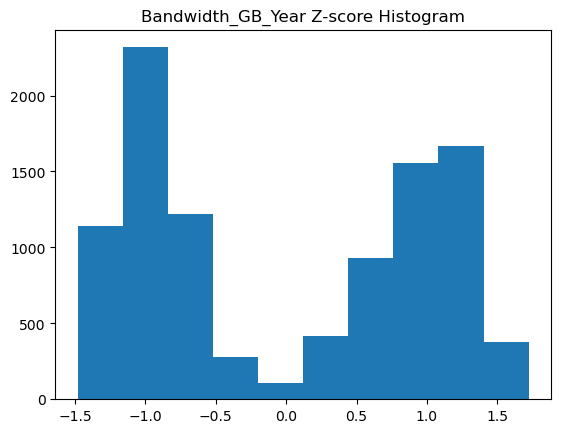

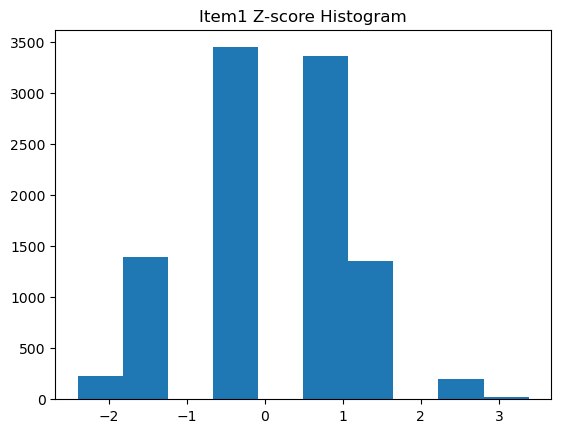

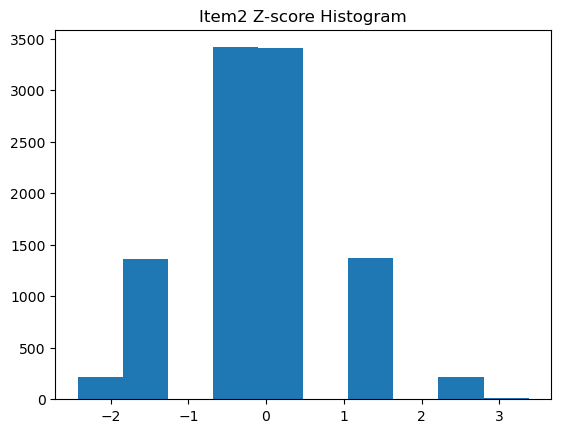

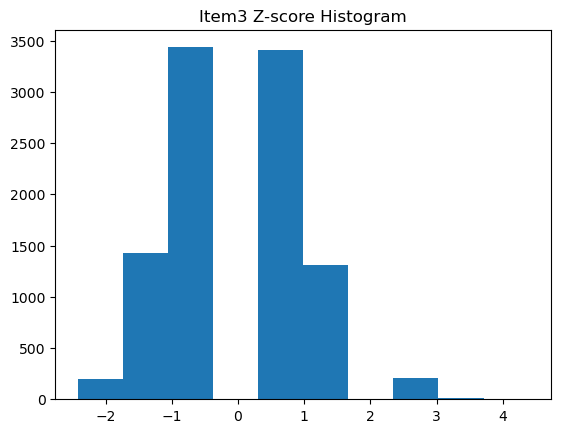

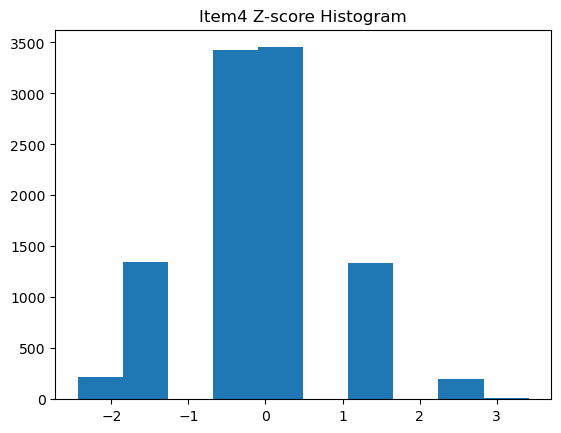

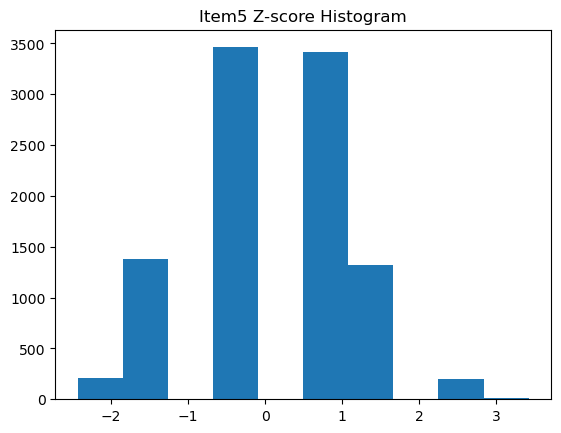

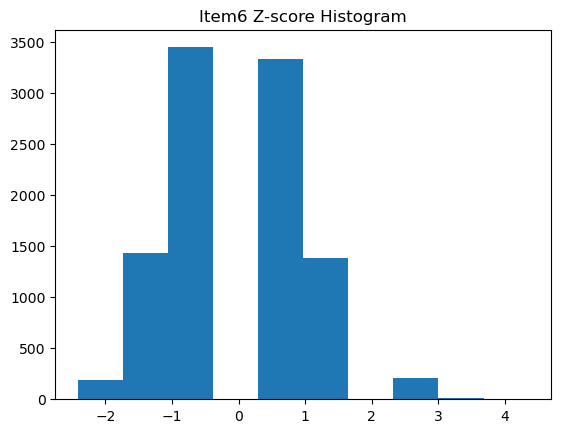

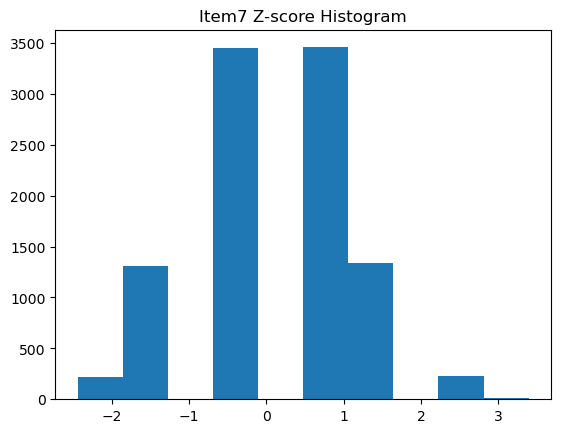

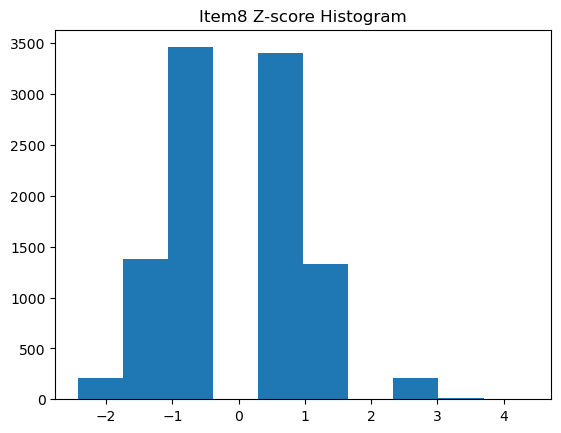

In [59]:
for column in dfq_c:
    dfq['zscore'] = stats.zscore(dfq[column])
    plt.hist(dfq['zscore'])
    plt.title(column + ' Z-score Histogram')
    plt.show()

In [60]:
# Run a for loop for all the identified variables that need to be fixed that will be replaced with median
dfq_z_median = ['Population', 'Children', 'Income', 'Contacts', 'Yearly_equip_failure']
dfq_z_median 
for column in dfq_z_median:
    # create nulls for outliers in population
    dfq['zscore'] = stats.zscore(dfq[column])
    dfq[column] = np.where(dfq['zscore'] > 2, np.nan, dfq[column])
    dfq[column] = np.where(dfq['zscore'] < -2, np.nan, dfq[column])
    # use fillna function to impute outliers with median
    dfq[column] = dfq[column].fillna(dfq[column].median())

In [61]:
# Run a for loop for all the identified variables that need to be fixed that will be replaced with mean
dfq_z_mean = ['Outage_sec_perweek', 'Email', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8']
dfq_z_mean 
for column in dfq_z_mean:
     # create nulls for outliers in population
    dfq['zscore'] = stats.zscore(dfq[column])
    dfq[column] = np.where(dfq['zscore'] > 2, np.nan, dfq[column])
    dfq[column] = np.where(dfq['zscore'] < -2, np.nan, dfq[column])
    # use fillna function to impute outliers with mean
    dfq[column] = dfq[column].fillna(dfq[column].mean())   

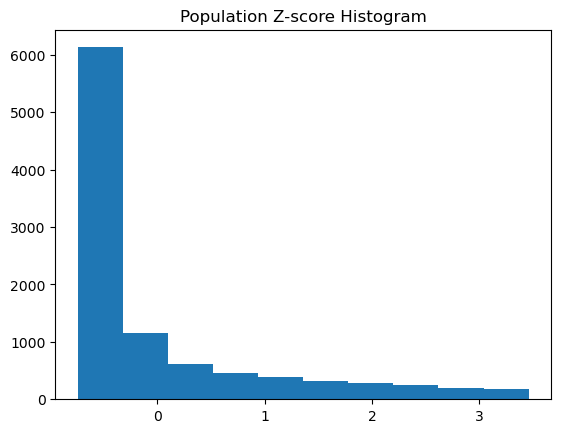

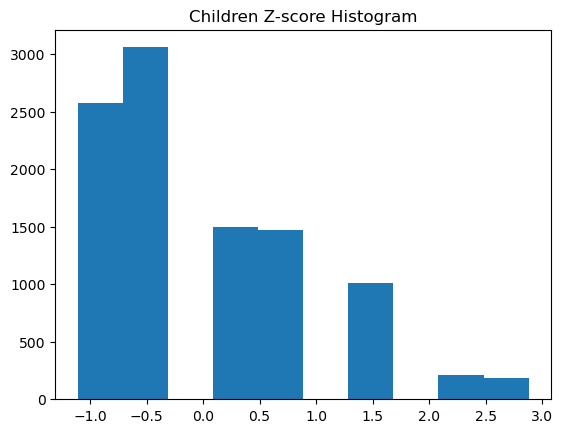

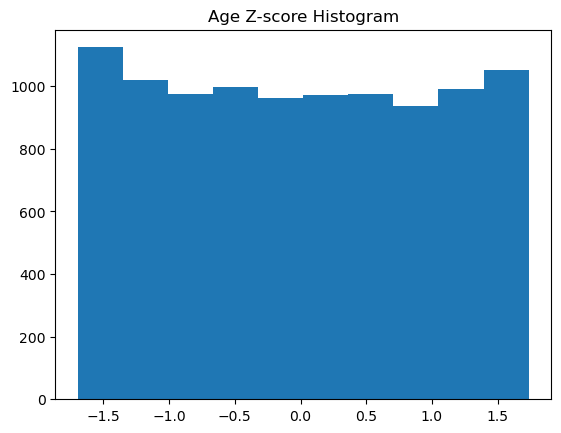

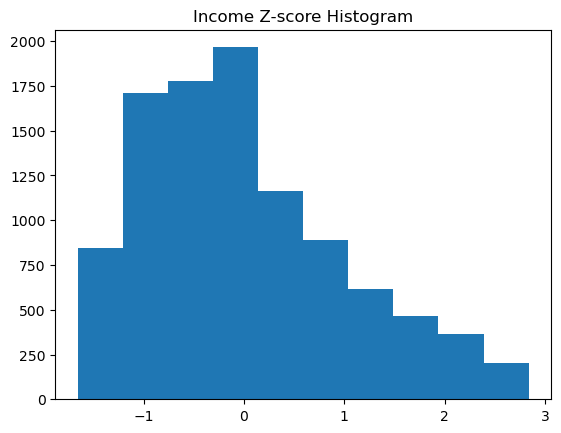

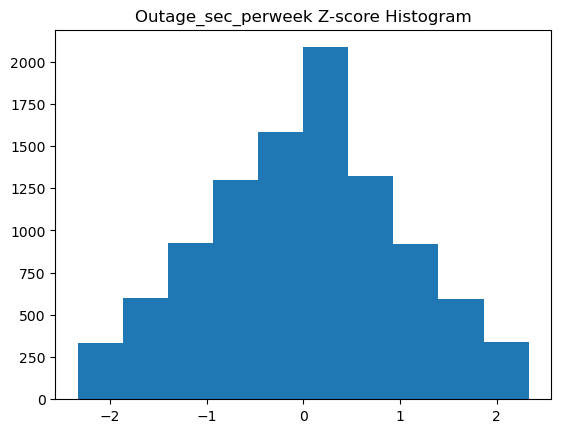

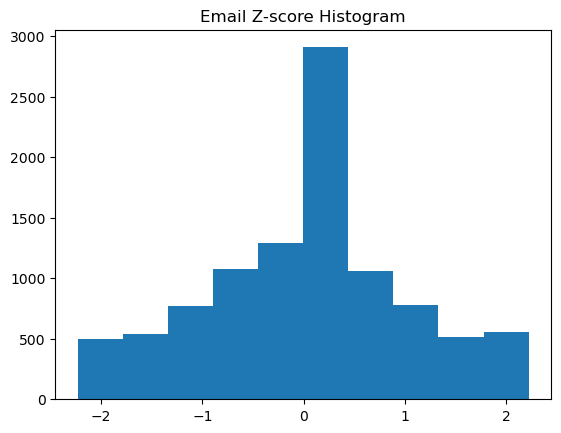

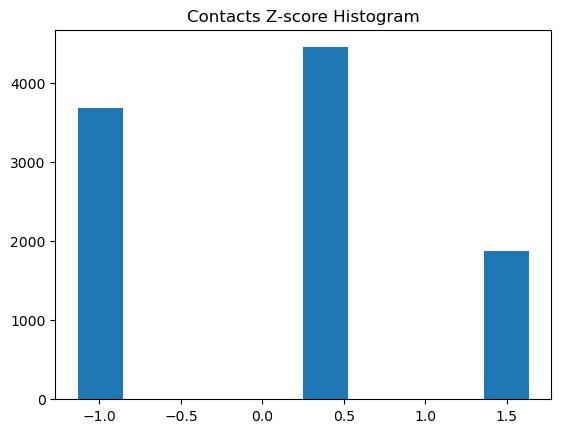

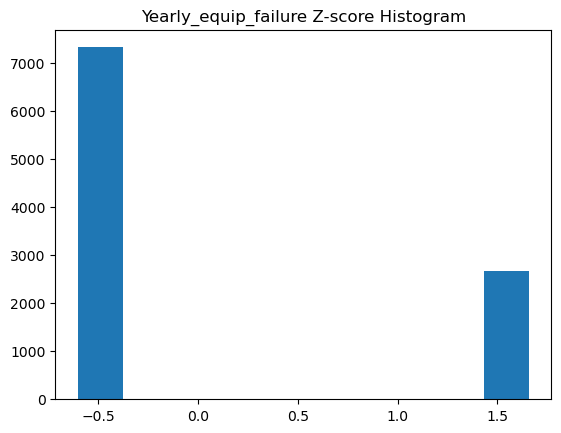

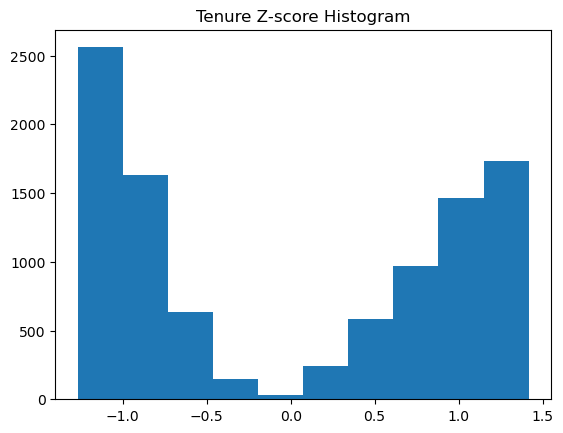

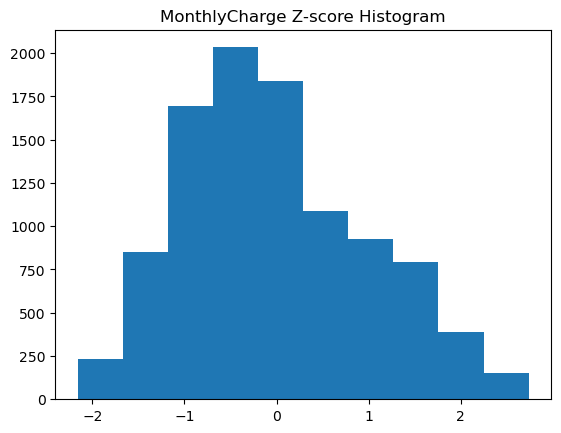

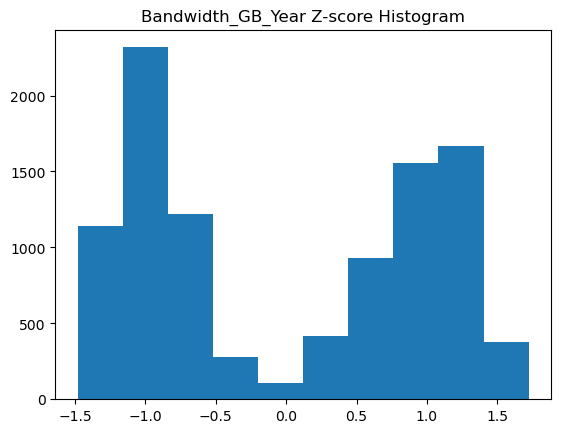

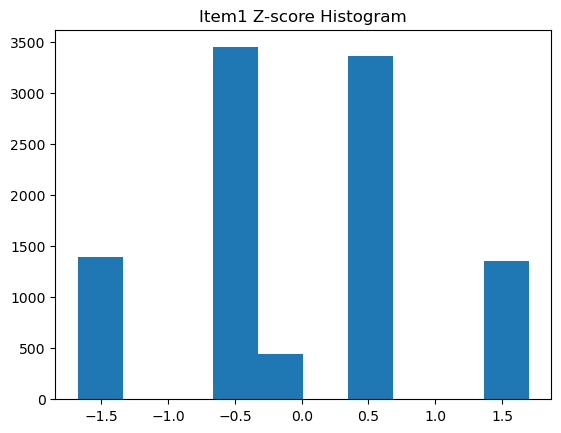

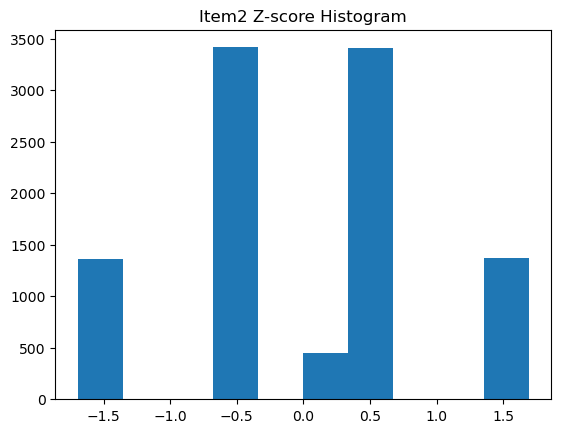

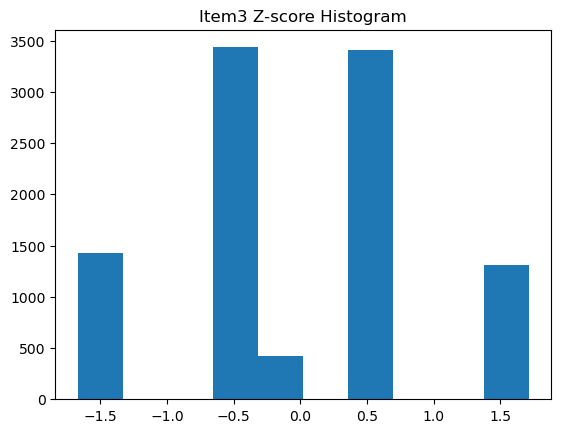

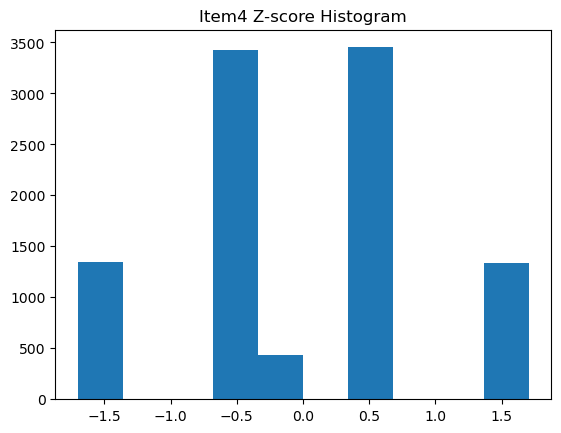

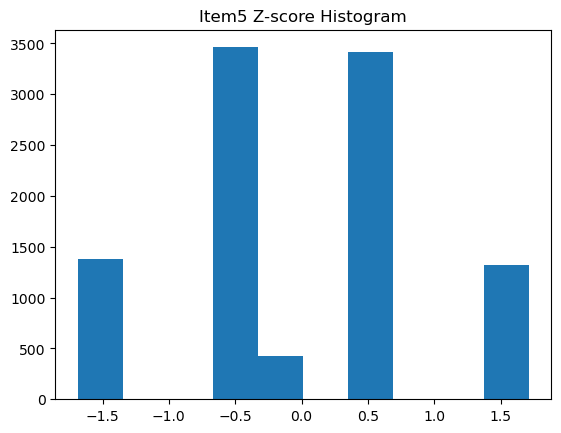

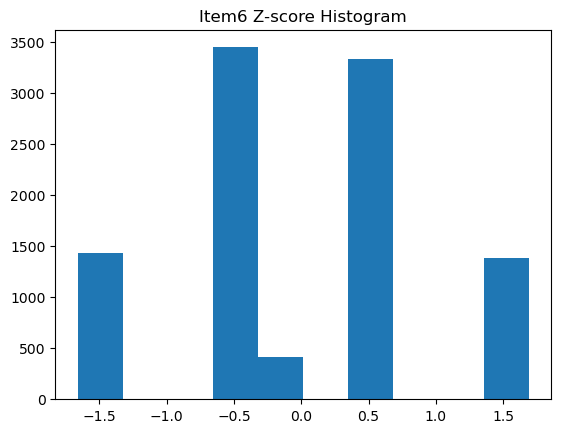

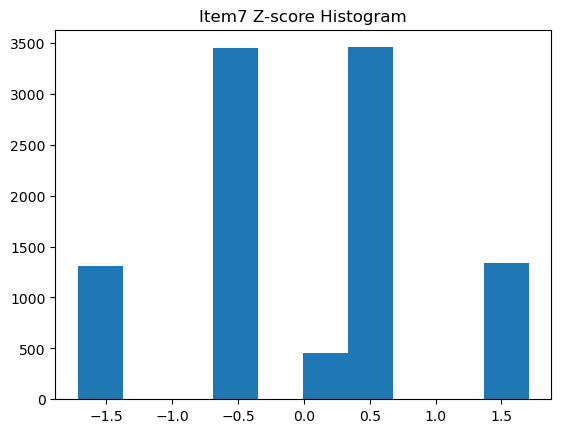

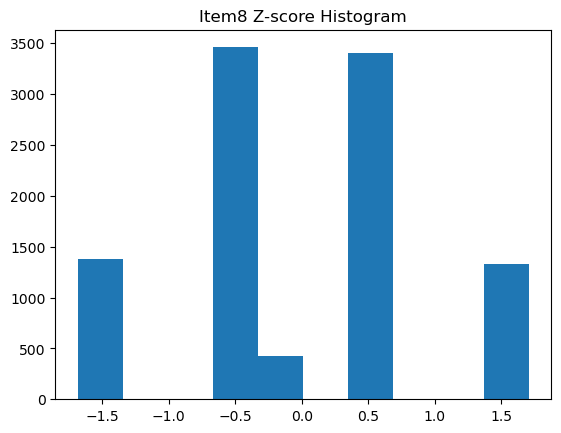

In [62]:
# check new histograms
for column in dfq_c:
    dfq['zscore'] = stats.zscore(dfq[column])
    plt.hist(dfq['zscore'])
    plt.title(column + ' Z-score Histogram')
    plt.show()

### One Hot Encoding the Binary Qualitative Variables

We can one hot encode the rest of the variables that we will be using by using the map function.

In [63]:
dfq_ql = ['Churn','Techie','Port_modem','Tablet','Phone','Multiple','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling']
for column in dfq_ql:
    dfq[column] = df[column].map({'Yes': 1,'No': 0})

In [64]:
dfq

,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,...,Tablet,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling
0,38.0,0.0,68,28561.99,7.978323,10.0,0.0,1.0,6.795513,172.455519,...,1,1,0,1,1,0,0,0,1,1
1,10446.0,1.0,27,21704.77,11.699080,12.0,0.0,1.0,1.156681,242.632554,...,1,1,1,1,0,0,0,1,1,1
2,3735.0,4.0,50,9609.57,10.752800,9.0,0.0,1.0,15.754144,159.947583,...,0,1,1,0,0,0,0,0,1,1
3,13863.0,1.0,48,18925.23,14.913540,15.0,2.0,0.0,17.087227,119.956840,...,0,1,0,1,0,0,0,1,0,1
4,11352.0,0.0,83,40074.19,8.147417,16.0,2.0,1.0,1.670972,149.948316,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,640.0,3.0,23,55723.74,9.415935,12.0,2.0,0.0,68.197130,159.979400,...,1,1,1,0,1,1,0,0,0,0
9996,2610.0,4.0,48,34129.34,6.740547,15.0,2.0,0.0,61.040370,207.481100,...,0,1,1,1,1,1,0,1,0,0
9997,406.0,1.0,48,45983.43,6.590911,10.0,0.0,0.0,47.416890,169.974100,...,0,1,1,1,1,0,0,0,0,1
9998,35575.0,1.0,39,16667.58,12.071910,14.0,1.0,0.0,71.095600,252.624000,...,1,0,1,0,0,0,1,1,1,1


## C4:CLEANED DATA SET

In [65]:
dfq.to_csv('prepared_data_task1.csv')

## D1:SPLITTING THE DATA

In [66]:
# Split into X and y
X = dfq.drop("Churn", axis=1).values
y = dfq["Churn"].values

In [67]:
# split into test and training data sets for both
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


## D2:OUTPUT AND INTERMEDIATE CALCULATIONS

## D3:CODE EXECUTION

Here we set the k number of neighbors and fit to the model

In [68]:
# set up  model with number of neighbors
knn = KNeighborsClassifier(n_neighbors=5)

In [69]:
# fir to the training data
knn.fit(X_train, y_train)

KNeighborsClassifier()

## E1:ACCURACY AND AUC

The accuracy and the AUC score for the model is calculated here

In [73]:
# print the results
print(knn.score(X_test, y_test))

0.723


/Users/rjcalabio/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [ ]:
sklearn.metrics.roc_auc_score

## E2:RESULTS AND IMPLICATIONS

## E3:LIMITATION

## E4:COURSE OF ACTION

## G:SOURCES FOR THIRD-PARTY CODE

## H:SOURCES

https://medium.com/swlh/k-nearest-neighbor-ca2593d7a3c4

https://app.datacamp.com/learn/custom-tracks/custom-data-mining-i